In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [5]:
X,Y = make_moons(100,noise=0.25,random_state=2)

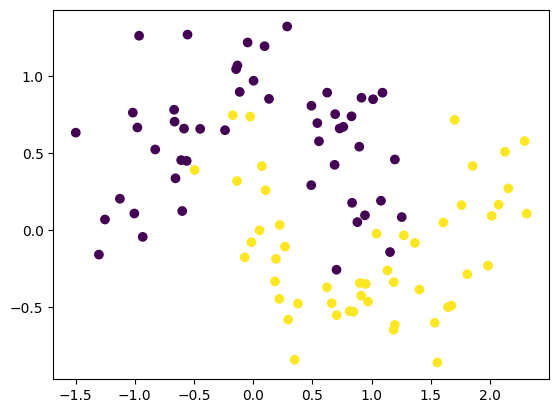

In [6]:
plt.scatter(X[:,0],X[:,-1],c=Y)

In [7]:
model = Sequential()
model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history = model.fit(X,Y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


(-1.5, 2.0)

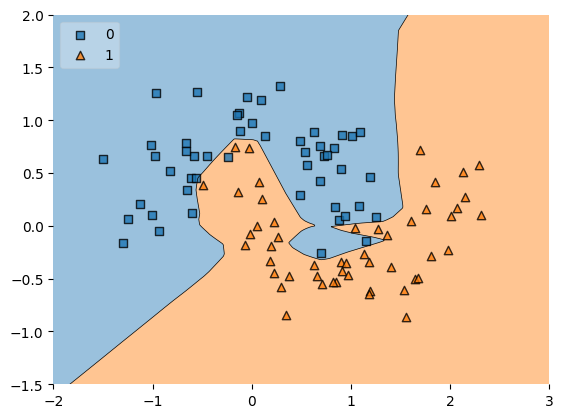

In [9]:
plot_decision_regions(X,Y.astype('int'),clf=model,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)

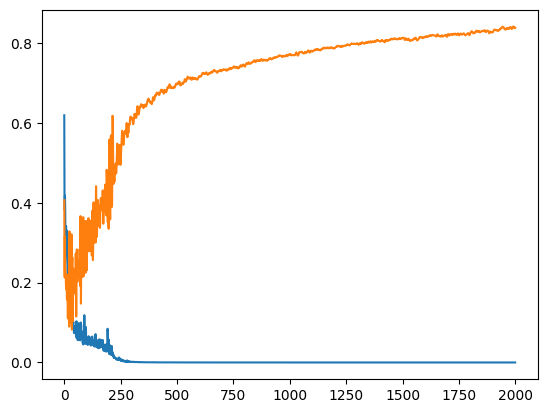

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# using L2 regularization

In [12]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model1.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history = model1.fit(X,Y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


(-1.5, 2.0)

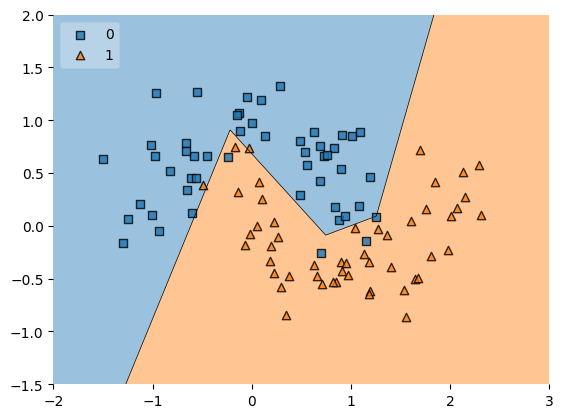

In [14]:
plot_decision_regions(X,Y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)

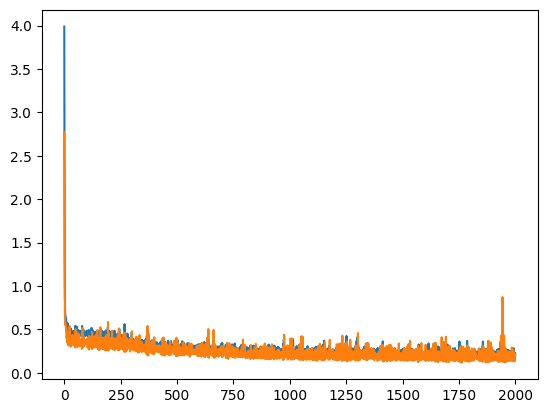

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [19]:
model.get_weights()[0].reshape(256)

array([ 4.76979874e-02,  2.13212073e-02, -4.29628104e-01,  8.69990289e-02,
       -4.51494068e-01, -2.44833067e-01, -2.43917733e-01,  2.02222735e-01,
        1.51456743e-01, -5.04056811e-01, -6.95131943e-02,  1.50860578e-01,
       -3.54348928e-01, -8.39733332e-02,  2.59989619e-01, -2.08313391e-01,
       -2.38011070e-02, -4.02280092e-01, -2.37398744e-01, -1.28385454e-01,
        1.88982725e-01, -7.51843750e-02, -5.66652298e-01, -2.54212499e-01,
       -3.90819997e-01,  2.94110924e-01,  1.62366405e-01,  2.28609424e-02,
       -5.73810160e-01, -3.93848538e-01,  1.87782824e-01,  2.35399932e-01,
       -7.08458871e-02, -2.91131526e-01, -5.05737066e-01,  2.82833576e-01,
       -1.22277960e-01, -4.22046334e-01,  2.41557449e-01,  2.55626380e-01,
        3.83343518e-01, -2.19639689e-01,  2.90691644e-01,  1.83907256e-01,
        3.33306752e-02, -4.74968612e-01,  2.65824735e-01, -4.76915091e-01,
       -3.85907620e-01,  2.09088981e-01,  1.59249939e-02, -4.26324248e-01,
       -4.07540530e-01, -

In [21]:
model1.get_weights()[0].reshape(256)

array([-8.92536273e-36, -1.25249325e-35,  1.16004568e-35,  4.40538032e-36,
        5.76252241e-36,  4.56824770e-36, -1.05647777e-35, -1.06751059e-35,
       -2.78449816e-36, -1.67480681e-36, -2.61731415e-36,  3.55709871e-36,
       -5.45510452e-36,  7.76064757e-36, -4.89420345e-36, -9.43338808e-36,
       -3.21840797e-36,  3.29952167e-36,  5.71409210e-36,  1.97826017e-36,
       -3.16651661e-36,  1.16972995e-35,  4.52171437e-36, -4.35366115e-36,
        4.46712534e-36, -8.15022092e-36,  5.90972955e-35, -7.48377933e-36,
        5.88867030e-36, -8.02598041e-36, -2.69619833e-36,  6.56765856e-36,
        4.77530231e-36, -1.22506443e-35, -6.53359763e-36,  3.94985473e-36,
        8.19080718e-36, -1.22842360e-35,  1.30726878e-36,  3.47094231e-36,
        2.78469331e-36, -5.71936011e-01, -1.26126411e-35, -3.06507784e-36,
        7.57147219e-36,  4.88310678e-36, -9.99236922e-36, -1.99139677e-36,
       -2.57155496e-36, -7.02834558e-36, -1.01544212e-36, -6.46375817e-36,
       -8.42097420e-36, -

In [20]:
model_weight_layer1 = model.get_weights()[0].reshape(256)
model1_weight_layer1 = model1.get_weights()[0].reshape(256)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: >

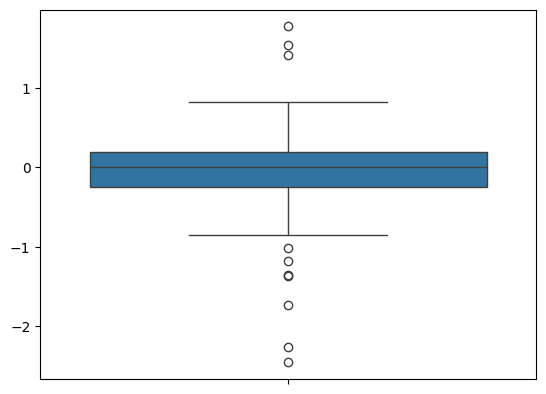

In [22]:
sns.boxplot(model_weight_layer1)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: >

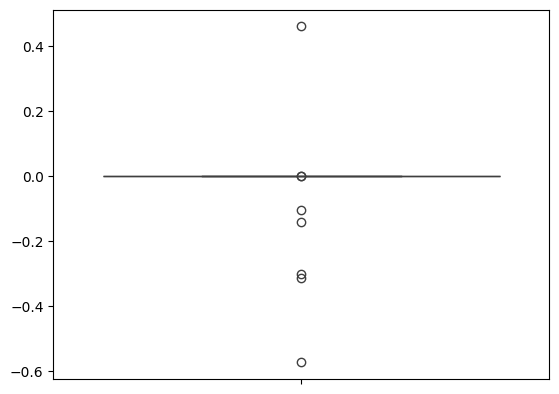

In [23]:
sns.boxplot(model1_weight_layer1)

In [24]:
model_weight_layer1.max()

1.77615

In [25]:
model1_weight_layer1.max()

0.46185344

<Axes: ylabel='Density'>

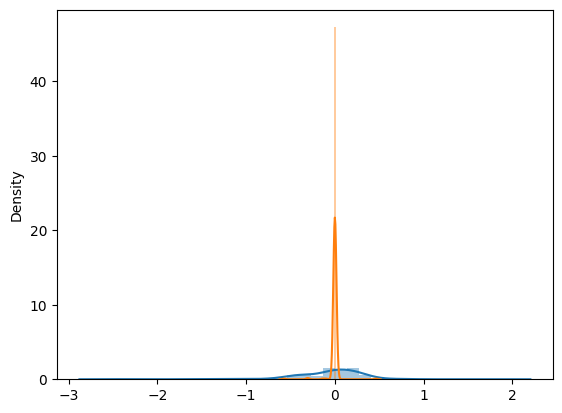

In [29]:
sns.distplot(model_weight_layer1)
sns.distplot(model1_weight_layer1)

# using L1 regularization

In [31]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model1.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history = model1.fit(X,Y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


(-1.5, 2.0)

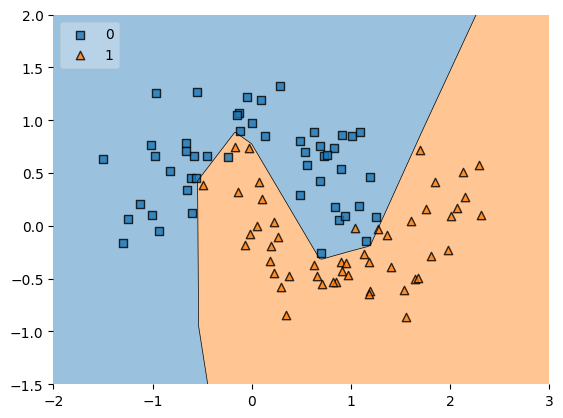

In [33]:
plot_decision_regions(X,Y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)

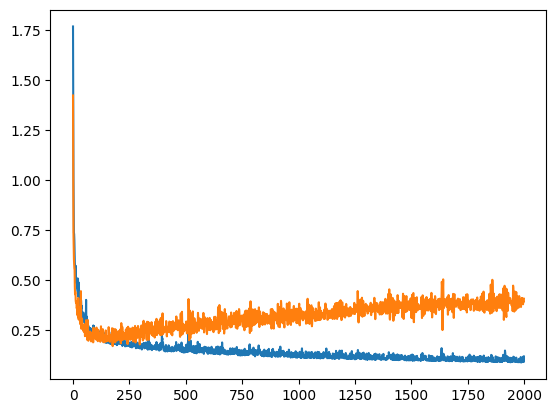

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [35]:
model.get_weights()[0].reshape(256)

array([ 4.76979874e-02,  2.13212073e-02, -4.29628104e-01,  8.69990289e-02,
       -4.51494068e-01, -2.44833067e-01, -2.43917733e-01,  2.02222735e-01,
        1.51456743e-01, -5.04056811e-01, -6.95131943e-02,  1.50860578e-01,
       -3.54348928e-01, -8.39733332e-02,  2.59989619e-01, -2.08313391e-01,
       -2.38011070e-02, -4.02280092e-01, -2.37398744e-01, -1.28385454e-01,
        1.88982725e-01, -7.51843750e-02, -5.66652298e-01, -2.54212499e-01,
       -3.90819997e-01,  2.94110924e-01,  1.62366405e-01,  2.28609424e-02,
       -5.73810160e-01, -3.93848538e-01,  1.87782824e-01,  2.35399932e-01,
       -7.08458871e-02, -2.91131526e-01, -5.05737066e-01,  2.82833576e-01,
       -1.22277960e-01, -4.22046334e-01,  2.41557449e-01,  2.55626380e-01,
        3.83343518e-01, -2.19639689e-01,  2.90691644e-01,  1.83907256e-01,
        3.33306752e-02, -4.74968612e-01,  2.65824735e-01, -4.76915091e-01,
       -3.85907620e-01,  2.09088981e-01,  1.59249939e-02, -4.26324248e-01,
       -4.07540530e-01, -

In [36]:
model1.get_weights()[0].reshape(256)

array([-3.65430443e-03, -1.13443297e-03, -5.09599806e-04, -3.39703547e-05,
       -4.36691567e-04,  1.28035073e-03,  2.48721126e-03,  1.63667696e-03,
       -1.23154046e-03,  1.20260357e-03,  6.82782847e-04,  1.22913276e-03,
       -6.58002740e-04, -8.78273917e-04, -4.02237813e-04,  2.38014013e-03,
        2.43412374e-04, -8.32297024e-04,  2.74104672e-03, -5.34922117e-04,
        3.88710643e-04,  1.83811784e-03, -3.00631917e-04,  2.26166667e-04,
        3.73871415e-04,  1.32335047e-03,  3.06065893e-04,  4.97370609e-04,
        3.81905888e-03,  4.94801819e-01,  1.27355242e-03, -5.39600034e-04,
        3.76879878e-04, -8.52444384e-04, -6.05781330e-04,  8.00889276e-04,
        3.61665385e-04,  2.16520275e-04,  5.51862240e-01,  6.61701488e-04,
       -1.62926316e-03, -1.80449046e-03, -6.12295233e-04, -5.49891114e-01,
       -2.06808210e-04,  1.36346964e-04,  1.06451032e-03,  1.83743681e-03,
       -9.08651273e-05,  2.17331015e-03,  1.26781454e-03,  1.17101467e+00,
        6.51836046e-04, -

In [37]:
model_weight_layer1 = model.get_weights()[0].reshape(256)
model1_weight_layer1 = model1.get_weights()[0].reshape(256)

<Axes: >

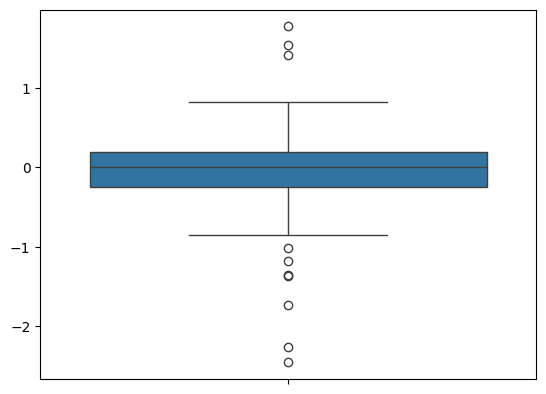

In [38]:
sns.boxplot(model_weight_layer1)

<Axes: >

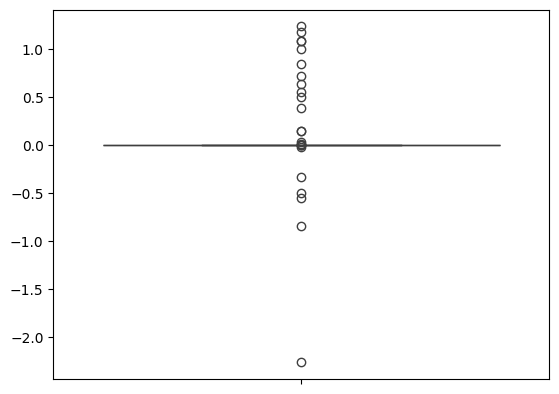

In [39]:
sns.boxplot(model1_weight_layer1)

In [40]:
model_weight_layer1.max()

1.77615

In [41]:
model1_weight_layer1.max()

1.2315178

<Axes: ylabel='Density'>

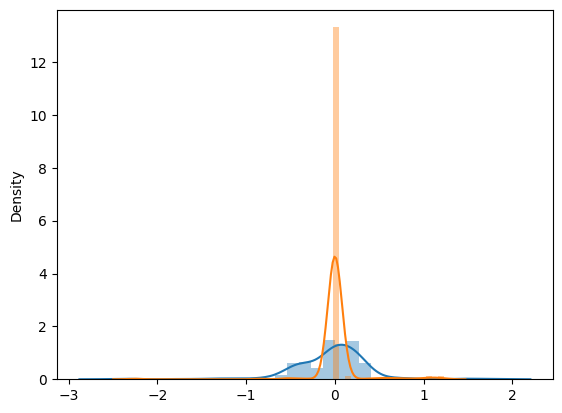

In [42]:
sns.distplot(model_weight_layer1)
sns.distplot(model1_weight_layer1)